In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from wordcloud import wordcloud
import nltk

nltk.download(['stopwords', 'punkt', 'wordnet', 'omw-1.4', 'vader_lexicon'])
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [3]:
#loading the data
df = pd.read_csv("tourist_accommodation_reviews.csv")
df

,ID,Review Date,Location,Hotel/Restaurant name,Review
0,rn579778340,Reviewed 1 week ago,Kathu,Thong Dee The Kathu Brasserie,Just been for sunday roast lamb and beef truly...
1,rn576350875,Reviewed 3 weeks ago,Kathu,Thong Dee The Kathu Brasserie,"Quietly set off the main road, nice atmosphere..."
2,rn574921678,Reviewed 4 weeks ago,Kathu,Thong Dee The Kathu Brasserie,I made a reservation for a birthday two days i...
3,rn572905503,"Reviewed April 12, 2018",Kathu,Thong Dee The Kathu Brasserie,We visit here regularly and never fail to be i...
4,rn572364712,"Reviewed April 10, 2018",Kathu,Thong Dee The Kathu Brasserie,Visited this wonderful place on my travels and...
...,...,...,...,...,...
53639,rn162368197,"Reviewed May 29, 2013",Patong,Bite in,"I love this small restaurant, for the great fo..."
53640,rn161843734,"Reviewed May 25, 2013",Patong,Bite in,We stopped at this restaurant after shopping a...
53641,rn161734077,"Reviewed May 24, 2013",Patong,Bite in,"Great times ,This is one of the best restauran..."
53642,rn161218072,"Reviewed May 19, 2013",Patong,Bite in,"Bite in, it has become my favorite restaurant ..."


In [4]:
df.describe()

,ID,Review Date,Location,Hotel/Restaurant name,Review
count,53644,53644,53644,53644,53644
unique,49944,2344,25,537,49938
top,rn564592095,Reviewed 1 week ago,Patong,Da Mario,I have been to this restaurant several times f...
freq,10,616,16403,279,10


In [5]:

top30 = df["Hotel/Restaurant name"].value_counts()[:30].index.to_frame()
top30

,0
Da Mario,Da Mario
Sabai Sabai,Sabai Sabai
No.6 Restaurant,No.6 Restaurant
The Pizza Company,The Pizza Company
The Family Restaurant,The Family Restaurant
Outdoor Restaurant,Outdoor Restaurant
Thong Dee The Kathu Brasserie,Thong Dee The Kathu Brasserie
Joe's Downstairs,Joe's Downstairs
Full Moon Brewworks - Microbrewery & Lobs n' Roll,Full Moon Brewworks - Microbrewery & Lobs n' Roll
The Coffee Club - The Turtle Village,The Coffee Club - The Turtle Village


In [6]:
dfreviews = df[["Hotel/Restaurant name", "Review"]]
dfreviews

,Hotel/Restaurant name,Review
0,Thong Dee The Kathu Brasserie,Just been for sunday roast lamb and beef truly...
1,Thong Dee The Kathu Brasserie,"Quietly set off the main road, nice atmosphere..."
2,Thong Dee The Kathu Brasserie,I made a reservation for a birthday two days i...
3,Thong Dee The Kathu Brasserie,We visit here regularly and never fail to be i...
4,Thong Dee The Kathu Brasserie,Visited this wonderful place on my travels and...
...,...,...
53639,Bite in,"I love this small restaurant, for the great fo..."
53640,Bite in,We stopped at this restaurant after shopping a...
53641,Bite in,"Great times ,This is one of the best restauran..."
53642,Bite in,"Bite in, it has become my favorite restaurant ..."


In [7]:
df2 =dfreviews[dfreviews['Hotel/Restaurant name'].isin(top30[0])]
df2

,Hotel/Restaurant name,Review
0,Thong Dee The Kathu Brasserie,Just been for sunday roast lamb and beef truly...
1,Thong Dee The Kathu Brasserie,"Quietly set off the main road, nice atmosphere..."
2,Thong Dee The Kathu Brasserie,I made a reservation for a birthday two days i...
3,Thong Dee The Kathu Brasserie,We visit here regularly and never fail to be i...
4,Thong Dee The Kathu Brasserie,Visited this wonderful place on my travels and...
...,...,...
50012,Outdoor Restaurant,this place is value for money and a big select...
50013,Outdoor Restaurant,"Polite, quick service and a great range of foo..."
50014,Outdoor Restaurant,"Don’t expect much, this is not a place for pic..."
50015,Outdoor Restaurant,We had our dinner here after we married. There...


In [8]:
df2['Hotel/Restaurant name'].value_counts()

Da Mario                                                    279
Sabai Sabai                                                 200
No.6 Restaurant                                             200
The Pizza Company                                           198
The Family Restaurant                                       196
Outdoor Restaurant                                          193
Da Maurizio Beach Side                                      100
Rum Jungle                                                  100
Don's Bar B Q                                               100
Pizzeria Hut 1                                              100
Joe's Downstairs                                            100
The Coffee Club - The Turtle Village                        100
Full Moon Brewworks - Microbrewery & Lobs n' Roll           100
Red Snapper                                                 100
Baan Rim Pa Patong                                          100
Kan Eang@Pier Restaurant                

In [9]:
stop_words = nltk.corpus.stopwords.words('english')

In [10]:
def preprocess_text(text):
    tdoc = nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+').tokenize(text)
    ctoken = [word.lower() for word in tdoc if word.lower() not in stop_words]
    stem_text = [nltk.stem.PorterStemmer().stem(word) for word in ctoken]
    return stem_text

In [11]:
#preprocessing the reviews
df2["Review_token"] = df2["Review"].apply(preprocess_text)
df2

<ipython-input-11-88616bf14e31>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Review_token"] = df2["Review"].apply(preprocess_text)


,Hotel/Restaurant name,Review,Review_token
0,Thong Dee The Kathu Brasserie,Just been for sunday roast lamb and beef truly...,"[sunday, roast, lamb, beef, truli, excel, 11ou..."
1,Thong Dee The Kathu Brasserie,"Quietly set off the main road, nice atmosphere...","[quietli, set, main, road, nice, atmospher, im..."
2,Thong Dee The Kathu Brasserie,I made a reservation for a birthday two days i...,"[made, reserv, birthday, two, day, advanc, ass..."
3,Thong Dee The Kathu Brasserie,We visit here regularly and never fail to be i...,"[visit, regularli, never, fail, impress, quali..."
4,Thong Dee The Kathu Brasserie,Visited this wonderful place on my travels and...,"[visit, wonder, place, travel, cannot, complai..."
...,...,...,...
50012,Outdoor Restaurant,this place is value for money and a big select...,"[place, valu, money, big, select, choos]"
50013,Outdoor Restaurant,"Polite, quick service and a great range of foo...","[polit, quick, servic, great, rang, food, free..."
50014,Outdoor Restaurant,"Don’t expect much, this is not a place for pic...","[expect, much, place, picki, travel, god, forb..."
50015,Outdoor Restaurant,We had our dinner here after we married. There...,"[dinner, marri, 16, us, organis, us, love, tab..."


In [12]:
#Sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sentiment = SentimentIntensityAnalyzer()

In [13]:
df2['compound'] = [sentiment.polarity_scores(review)['compound'] for review in df2['Review']]
df2['neg'] = [sentiment.polarity_scores(review)['neg'] for review in df2['Review']]
df2['neu'] = [sentiment.polarity_scores(review)['neu'] for review in df2['Review']]
df2['pos'] = [sentiment.polarity_scores(review)['pos'] for review in df2['Review']]

<ipython-input-13-c21032d8cbc2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['compound'] = [sentiment.polarity_scores(review)['compound'] for review in df2['Review']]
<ipython-input-13-c21032d8cbc2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['neg'] = [sentiment.polarity_scores(review)['neg'] for review in df2['Review']]
<ipython-input-13-c21032d8cbc2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [14]:
df2.head()

,Hotel/Restaurant name,Review,Review_token,compound,neg,neu,pos
0,Thong Dee The Kathu Brasserie,Just been for sunday roast lamb and beef truly...,"[sunday, roast, lamb, beef, truli, excel, 11ou...",0.0516,0.11,0.772,0.118
1,Thong Dee The Kathu Brasserie,"Quietly set off the main road, nice atmosphere...","[quietli, set, main, road, nice, atmospher, im...",0.9237,0.00,0.730,0.270
2,Thong Dee The Kathu Brasserie,I made a reservation for a birthday two days i...,"[made, reserv, birthday, two, day, advanc, ass...",0.6808,0.00,0.869,0.131
3,Thong Dee The Kathu Brasserie,We visit here regularly and never fail to be i...,"[visit, regularli, never, fail, impress, quali...",0.8419,0.00,0.823,0.177
4,Thong Dee The Kathu Brasserie,Visited this wonderful place on my travels and...,"[visit, wonder, place, travel, cannot, complai...",0.9734,0.00,0.557,0.443


In [15]:
#sentiment analysis result
df2[['compound', 'neg', 'neu', 'pos']].describe()

,compound,neg,neu,pos
count,3666.000000,3666.000000,3666.000000,3666.000000
mean,0.632478,0.028514,0.748560,0.222935
std,0.435057,0.052121,0.124429,0.131763
min,-0.941600,0.000000,0.298000,0.000000
25%,0.526700,0.000000,0.670000,0.127000
50%,0.826550,0.000000,0.752000,0.218000
75%,0.918050,0.046000,0.837000,0.310000
max,0.987200,0.497000,1.000000,0.698000


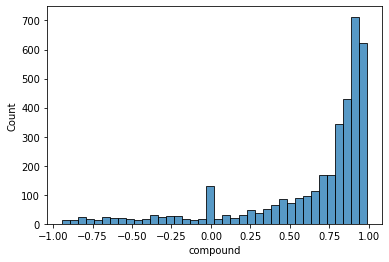

In [16]:
sns.histplot(df2['compound'])



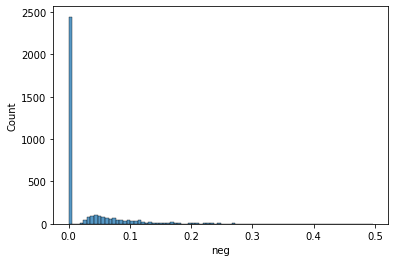

In [17]:
sns.histplot(df2['neg'])

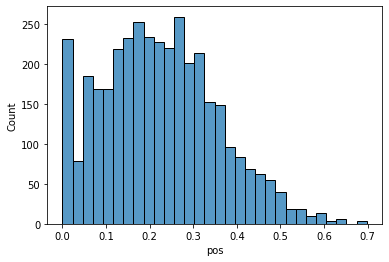

In [18]:
sns.histplot(df2['pos'])

In [19]:
#Grouping the restarunt names with compound results
(df2['compound']<=0).groupby(df2['Hotel/Restaurant name']).sum()

Hotel/Restaurant name
Baan Rim Pa Patong                                           9
Da Mario                                                    49
Da Maurizio Beach Side                                      11
Don's Bar B Q                                               10
Full Moon Brewworks - Microbrewery & Lobs n' Roll           13
Happy Days                                                   9
Harrys Steakhouse & Hotel                                   11
Joe's Downstairs                                             9
Kan Eang@Pier Restaurant                                    13
Louis' Kitchen                                              10
Natural Restaurant                                          20
No.6 Restaurant                                             18
Outdoor Restaurant                                          48
Pizzeria Hut 1                                              15
Red Snapper                                                 21
Red Tuna Restaurant Phuket       

In [20]:
#calculate %of negative reviews
negative_percent = pd.DataFrame((df2['compound']<=0).groupby(df2['Hotel/Restaurant name']).sum()
                                /df2['Hotel/Restaurant name'].groupby(df2['Hotel/Restaurant name']).count()*100,
                                columns = ['%negative reviews']).sort_values(by = '%negative reviews')

In [21]:
negative_percent

,%negative reviews
Hotel/Restaurant name,
Thong Dee The Kathu Brasserie,2.000000
Sweet Dream Restaurant,2.000000
S&G Family Restaurant,5.000000
Red Tuna Restaurant Phuket,7.000000
Rum Jungle,8.000000
The Family Restaurant,8.163265
Baan Rim Pa Patong,9.000000
Happy Days,9.000000
Joe's Downstairs,9.000000


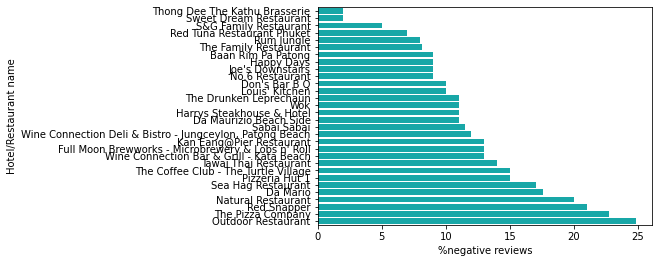

In [22]:
#plotting the %negative reviews
sns.barplot(data = negative_percent, x= '%negative reviews', y = negative_percent.index, color ='c')

In [23]:
#joining the results with the dataframe
review_positive = df2.loc[(df2['Hotel/Restaurant name'] == 'Da Mario') & (df2['compound'] >0)]
review_negative = df2.loc[(df2['Hotel/Restaurant name'] == 'Da Mario') & (df2['compound'] <0)]

In [24]:
review_positive

,Hotel/Restaurant name,Review,Review_token,compound,neg,neu,pos
29056,Da Mario,"This is one stop we make every time, looking p...","[one, stop, make, everi, time, look, past, ecl...",0.8047,0.032,0.809,0.159
29057,Da Mario,Fantastic food and a great host (Christian) gr...,"[fantast, food, great, host, christian, great,...",0.9718,0.000,0.411,0.589
29058,Da Mario,My wife and I tried this on spec. It was a nic...,"[wife, tri, spec, nice, place, run, italian, f...",0.8201,0.000,0.816,0.184
29060,Da Mario,We have been to Phuket first time (15jan-30jan...,"[phuket, first, time, 15jan, 30jan, accid, bum...",0.2263,0.063,0.835,0.102
29061,Da Mario,If you want to have a real pizza baked in a st...,"[want, real, pizza, bake, stoneowen, done, go,...",0.4767,0.000,0.909,0.091
...,...,...,...,...,...,...,...
45735,Da Mario,Would literally come here every day the pizza ...,"[would, liter, come, everi, day, pizza, good, ...",0.9029,0.074,0.621,0.305
45736,Da Mario,Da mario is the best place for you to have piz...,"[da, mario, best, place, pizza, go, eat, almos...",0.8555,0.000,0.787,0.213
45737,Da Mario,Great to find a local Italian fest with the fr...,"[great, find, local, italian, fest, friendli, ...",0.9286,0.000,0.646,0.354
45738,Da Mario,This place is truly worth a visit. The best Pi...,"[place, truli, worth, visit, best, pizza, tri,...",0.9466,0.064,0.583,0.353


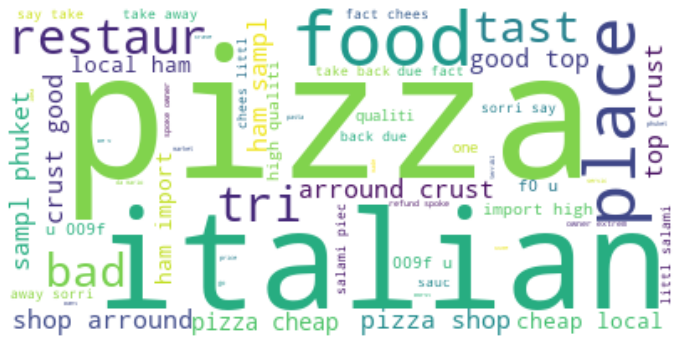

In [25]:
from wordcloud import WordCloud 

#negative reviews
neg_token = [word for df2 in review_negative['Review_token'] for word in df2]
wordcloud = WordCloud(background_color = 'white').generate_from_text( ' '.join(neg_token))

#plotting
plt.figure(figsize =(12,12))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()


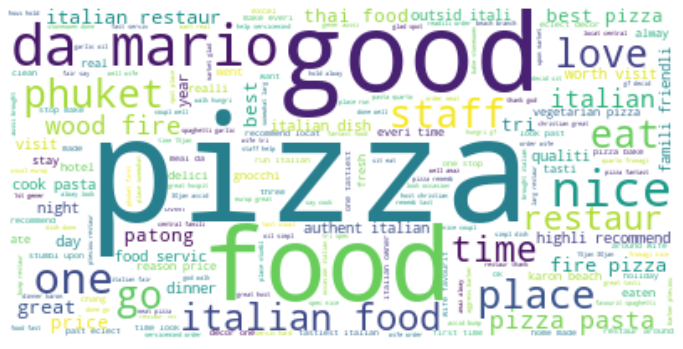

In [26]:
#positive reviews
pos_token = [word for df2 in review_positive['Review_token'] for word in df2]
wordcloud = WordCloud(background_color = 'white').generate_from_text( ' '.join(pos_token))

#plotting
plt.figure(figsize =(12,12))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [27]:
#finding frequent distribution of words
from nltk.probability import FreqDist
#positive Words
pos_freqdist = FreqDist(pos_token)
pos_freqdist.tabulate(10)

  pizza italian    food    good restaur   great    nice   place   pasta     one 
    166     130     125      97      88      74      58      57      56      53 


In [28]:
#Negative Words
neg_freqdist = FreqDist(neg_token)
neg_freqdist.tabulate(10)

  pizza     ham       u   crust qualiti italian    good  phuket    high    food 
     30      18      18      12      11      10       9       9       8       8 


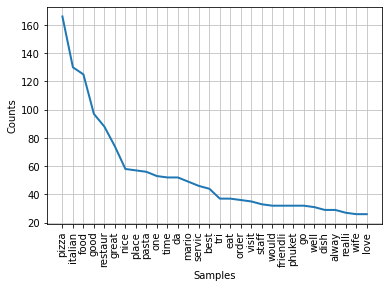

In [29]:
pos_freqdist.plot(30)

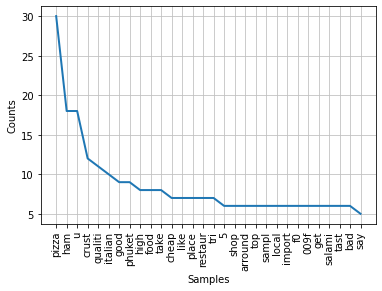

In [30]:
neg_freqdist.plot(30)